<a href="https://colab.research.google.com/github/lucasg1005/Quarentena_Dados/blob/master/QuarentenaDados_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importando bibliotecas

import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [0]:
#recebendo a base de dados "filmes"

filmes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv')
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
#recebendo base de dados "notas"
notas = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv')
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
#editando as colunas da base de dados "filmes"

filmes.columns = ["movieID", "title", "genre"]
filmes.head()

,movieID,title,genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
#editando as colunas da base de dados "notas"

notas.columns = ['userID', 'movieID', 'rate', 'time']
notas.head()

,userID,movieID,rate,time
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


**DESAFIO 1**
Quantos filmes não tem avaliações e quais são eles?

In [0]:
#agrupando a média de cada filme

nota_media_por_filme = notas.groupby('movieID')['rate'].mean()
nota_media_por_filme

movieID
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rate, Length: 9724, dtype: float64

In [0]:
#inserindo a coluna de nota média no banco de dados "filmes"

filmes_com_nota = filmes.join(nota_media_por_filme, on='movieID')

Comparando as tabelas, notamos que a tabela de "filmes_com_nota" possui 9742 linhas, enquanto que a tabela "nota_media_por_filme" possui 9724 linhas.
Portanto, 18 filmes não receberam avaliação.

In [0]:
#organizando a base de dados "filmes" por ordem crescente de nota
filmes_com_nota.sort_values("rate", ascending=True)

,movieID,title,genre,rate
5554,26696,Lionheart (1990),Action,0.5
2689,3604,Gypsy (1962),Musical,0.5
4881,7312,"Follow Me, Boys! (1966)",Comedy|Drama,0.5
9117,145724,Idaho Transfer (1973),Sci-Fi,0.5
7297,76030,Case 39 (2009),Horror|Thriller,0.5
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


Ao buscar os filmes por nota crescente, notamos que os ultimos filmos estão com "NaN", ao invés de um numero de 0.5 - 5.0. Concluindo que estes são os filmes que não possuem nenhuma avaliação.

In [0]:
#filtrando os filmes onde no campo de 'rate' o "valor" seja 'NaN'

filmes_sem_nota = filmes_com_nota.query('rate == "Nan"')

#descubrindo a quantidade de filmes sem nota

len(filmes_sem_nota)



18

Como concluido anteriormente, são 18 filmes que não receberam avaliações.
Que são:

In [0]:
filmes_sem_nota

,movieID,title,genre,rate
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


**DESAFIO 2**
Mudar o nome da coluna nota do dataframe filmes_com_media para nota_média após o join.

In [0]:
#alterando o nome da coluna "nota" por "nota média"
filmes_com_nota.rename(columns={'rate':'Nota Média'})

,movieID,title,genre,Nota Média
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9739,193585,Flint (2017),Drama,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


DESAFIO 3
Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.


In [0]:
#agrupando quantidade total de votos por filme

n_notas = notas.groupby('movieID')['rate'].count()
n_notas

movieID
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: rate, Length: 9724, dtype: int64

In [0]:
#inserindo a coluna de total de votos no banco de dados "filmes_com_nota"

n_filmes = filmes_com_nota.merge(n_notas, on='movieID', suffixes=('dMean','dTimes') )
n_filmes

,movieID,title,genre,ratedMean,ratedTimes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49
...,...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000,1
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000,1
9721,193585,Flint (2017),Drama,3.500000,1
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000,1


DESAFIO 4
Arredondar as médias (coluna de nota média) para duas casas decimais.

In [0]:
#arredondando a nota média com a função round() especificando 2 casas decimais

n_filmes['ratedMean'] = n_filmes['ratedMean'].round(decimals=2)
n_filmes

,movieID,title,genre,ratedMean,ratedTimes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7
4,5,Father of the Bride Part II (1995),Comedy,3.07,49
...,...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00,1
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50,1
9721,193585,Flint (2017),Drama,3.50,1
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50,1


DESAFIO 5
Descobrir os generos dos filmes 

In [0]:
#importando numpy para usar split e concatenate
n_generos = filmes.genre.str.split(pat='|')
generos = pd.Series(np.concatenate(n_generos))
generos

0        Adventure
1        Animation
2         Children
3           Comedy
4          Fantasy
           ...    
22079      Fantasy
22080        Drama
22081       Action
22082    Animation
22083       Comedy
Length: 22084, dtype: object

**DESAFIO 6**
Contar numero de aparições de genero

In [0]:
#utilizando a propriedade .value_counts()

generos = pd.Series(np.concatenate(n_generos)).value_counts()
generos

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

**DESAFIO 7**
Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

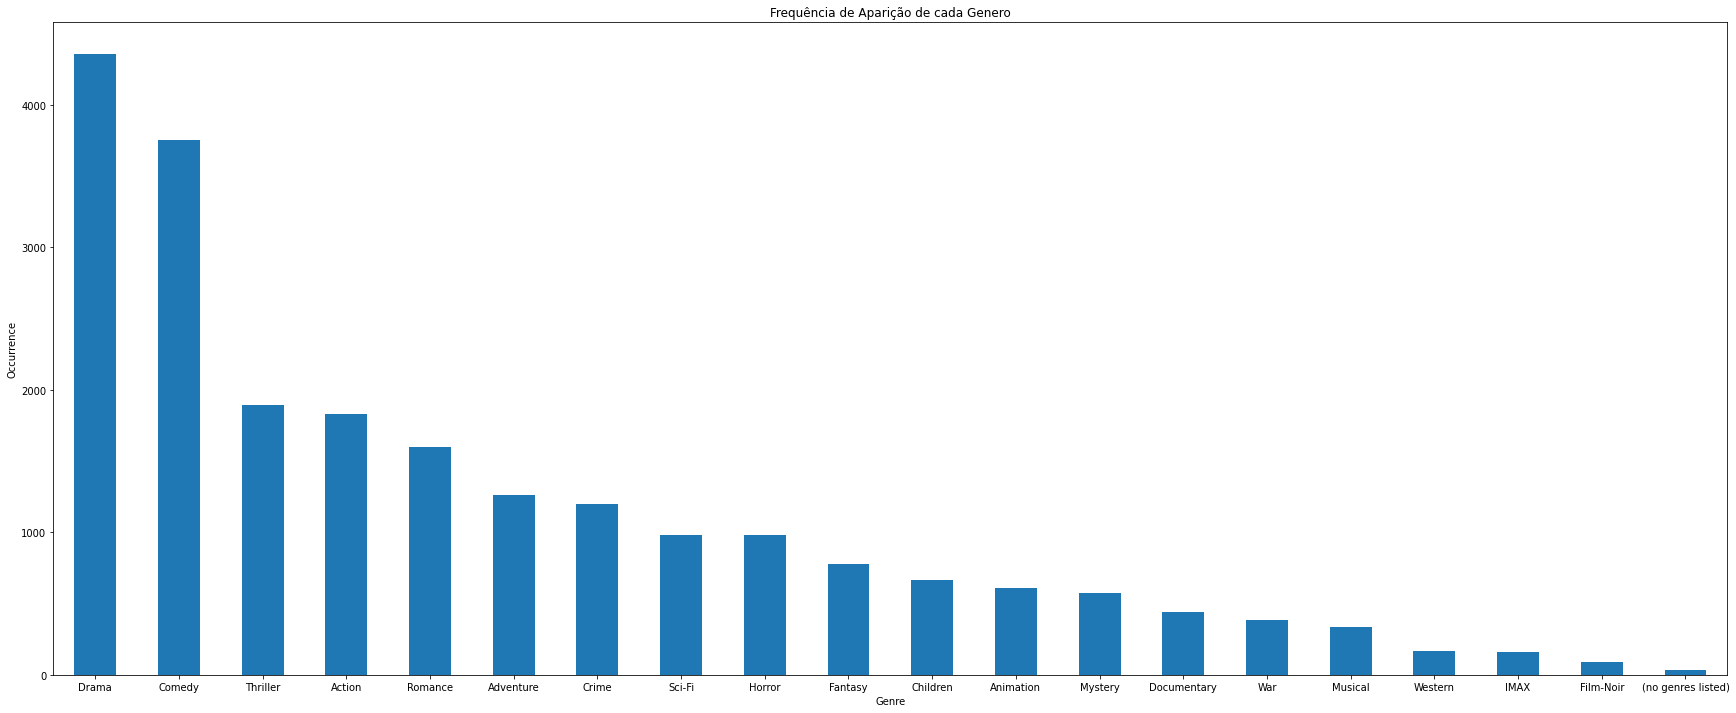

In [0]:
#plotando o objeto 'genero'

fontsize = 20
plt.figure(figsize=(30,12))
generos.plot(kind='bar', title="Frequência de Aparição de cada Genero")
plt.xlabel('Genre')
plt.ylabel('Occurrence')
plt.xticks(rotation=0)